### One-hot Encoding  Machine Learning Performance

In [1]:
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [59]:
# Plot Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Data

URL : https://www.kaggle.com/c/fake-news/data

In [3]:
#Read Data
df=pd.read_csv('train.csv')
df.shape

(20800, 5)

In [4]:
# Drop Nan Value
df=df.dropna()
df.shape

(18285, 5)

In [5]:
## Get the Independent Features
X=df.drop('label',axis=1)
## Get the Dependent features
y=df['label']

In [6]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.shape

(18285, 6)

### Vocabulary Size

In [7]:
### Vocabulary size
voc_size=5000

### Data Preprocessing

In [8]:
# Data Preprocessing
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
## One hot Representation
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [10]:
#Sentence Length
sent_length=0
for review_number in range(len(corpus)):
    number_of_words = len(corpus[review_number])
    if(number_of_words) > sent_length:
        sent_length = number_of_words
print(sent_length)

299


In [11]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4744 3294 1979]
 [   0    0    0 ... 2782  876 4783]
 [   0    0    0 ... 4785 1403 1110]
 ...
 [   0    0    0 ... 3727 3957  364]
 [   0    0    0 ... 2363 3168 3202]
 [   0    0    0 ... 4373 4986  410]]


In [12]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [13]:
X_final.shape

(18285, 299)

In [14]:
y_final.shape

(18285,)

### Data Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=0)

# Machine Learning Algorithms

## Naive Bayes  : BernoulliNB

accuracy:   0.688543
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      2040
           1       0.71      0.50      0.59      1617

    accuracy                           0.69      3657
   macro avg       0.69      0.67      0.67      3657
weighted avg       0.69      0.69      0.68      3657



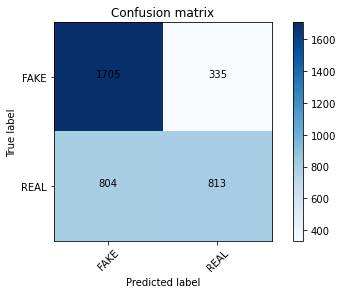

In [42]:
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB(alpha = 0.01)
bern.fit(X_train, y_train)
pred_bern = bern.predict(X_test)
score_bern = metrics.accuracy_score(y_test, pred_bern)
print("accuracy:   %f" % score_bern)
cm_bern = metrics.confusion_matrix(y_test, pred_bern)
plot_confusion_matrix(cm_bern ,classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_bern))


### Logistic Regression

accuracy:   0.726278
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.73      0.80      0.77      2040
           1       0.72      0.63      0.67      1617

    accuracy                           0.73      3657
   macro avg       0.72      0.72      0.72      3657
weighted avg       0.73      0.73      0.72      3657



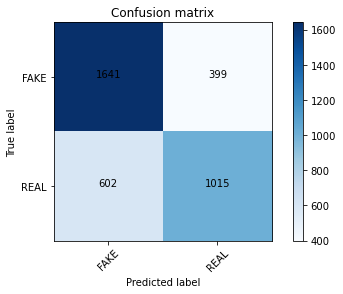

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 2 , solver = 'newton-cg')
LR.fit(X_train,y_train)
pred_lr=LR.predict(X_test)
score_lr = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %f" % score_lr)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_lr))

### Decision Tree

accuracy:   0.849
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2040
           1       0.84      0.82      0.83      1617

    accuracy                           0.85      3657
   macro avg       0.85      0.85      0.85      3657
weighted avg       0.85      0.85      0.85      3657



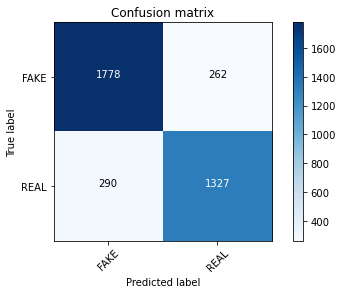

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = None, 
                            min_samples_split = 2, min_samples_leaf = 1)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
score_dt = metrics.accuracy_score(y_test, pred_dt)
print("accuracy:   %0.3f" % score_dt)
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_dt))

### Random Forest

accuracy:   0.891168
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2040
           1       0.82      0.96      0.89      1617

    accuracy                           0.89      3657
   macro avg       0.89      0.90      0.89      3657
weighted avg       0.90      0.89      0.89      3657



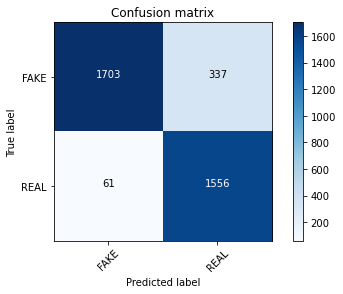

In [60]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2,
                             min_samples_leaf = 1, max_leaf_nodes = None)
RFC.fit(X_train, y_train)
pred_rfc=RFC.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("accuracy:   %f" % score_rfc)
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_rfc))

### Support Vector Machine

accuracy:   0.568772
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2040
           1       0.51      0.50      0.51      1617

    accuracy                           0.57      3657
   macro avg       0.56      0.56      0.56      3657
weighted avg       0.57      0.57      0.57      3657



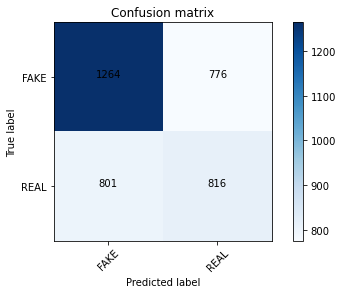

In [50]:
from sklearn import  svm
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
pred_svm=SVM.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %f" % score_svm)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_svm))

### ANN: MLPClassifier

C:\Users\elafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy:   0.783429
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2040
           1       0.76      0.75      0.75      1617

    accuracy                           0.78      3657
   macro avg       0.78      0.78      0.78      3657
weighted avg       0.78      0.78      0.78      3657



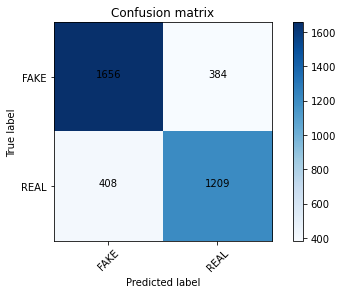

In [58]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic', solver='lbfgs',  early_stopping= False,
                                   alpha= 1 ,hidden_layer_sizes=(100))
MLPClassifierModel.fit(X_train, y_train)
pred_mlp=MLPClassifierModel.predict(X_test)
score_mlp= metrics.accuracy_score(y_test, pred_mlp)
print("accuracy:   %f" % score_mlp)
cm_mlp = metrics.confusion_matrix(y_test, pred_mlp)
plot_confusion_matrix(cm_mlp, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_mlp))